## The following is the code to predict what features to 'Country_India' being chosen and predicting how many respondants will be from India. 

## Connecting to directory containing the datasets

In [ ]:
import os
os.chdir("C:/Users/skavanagh1/OneDrive/Documents/Udacity/Project 1/")

###GETTING WORKING DIRECTORY
import os
cwd = os.getcwd()

In [ ]:
import pandas as pd

## Ingesting the 4 years of Stack Overflow data into dataframes

In [3]:
#YearOne_df = 2017 dataset
#YearTwo_df = 2018 dataset
#YearThree_df = 2019 dataset
#YearFour_df = 2020 dataset
YearOne_df = pd.read_csv("2017_2020 datasets/2017_survey_results_public.csv")
YearTwo_df = pd.read_csv("2017_2020 datasets/2018_survey_results_publicv1.csv")
YearThree_df = pd.read_csv("2017_2020 datasets/2019_survey_results_public.csv")
YearFour_df = pd.read_csv("2017_2020 datasets/2020_survey_results_public.csv")

C:\Users\skavanagh1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,13,14,15,16,17,51,52,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Appending the 4 dataframes into one dataframe containing data for all years

In [4]:
y1_y2_full = YearOne_df.append(YearTwo_df)
y1_y2_full.shape #(150247, 267)

(150247, 267)

In [5]:
y12_y3_full = y1_y2_full.append(YearThree_df)
y12_y3_full.shape #(239130, 335)

(239130, 335)

In [6]:
y1_y4_full = y12_y3_full.append(YearFour_df)
y1_y4_full.shape #(303591, 353)

(303591, 353)

## Imputing '0' for all nulls in the dataframe

In [7]:
df_zero =y1_y4_full.fillna(0) 
df_zero.shape #(303591, 353)

(303591, 353)

In [11]:
df_zero.head(2)

,Year,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,...,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,WebframeDesireNextYear,WebframeWorkedWith
0,2017,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",...,0,0,0,0,0,0,0,0,0,0


## Creating the dataframe with specific columns for the Model 

In [24]:
df_q4 = df_zero[['Year', 'Respondent','Gender', 'Professional','ProgramHobby','Country','University','EmploymentStatus']].copy()

In [25]:
#Identifying the numeric columns
cols = df_q4.columns
num_cols = df_q4._get_numeric_data().columns
num_cols

Index(['Year', 'Respondent'], dtype='object')

In [26]:
#Based on the above, identifying the categorical features
list(set(cols) - set(num_cols))

['University',
 'EmploymentStatus',
 'Country',
 'ProgramHobby',
 'Professional',
 'Gender']

## Encode categorical variables

In [ ]:
dfdummy_nazero = pd.get_dummies(df_q4, columns=['University','EmploymentStatus', 
 'ProgramHobby',
 'Professional',
 'Gender',
 'Country'])

In [40]:
#Showing all columns
dfdummy_nazero.columns

Index(['Year', 'Respondent', 'University_0', 'University_I prefer not to say',
       'University_No', 'University_Yes, full-time',
       'University_Yes, part-time', 'EmploymentStatus_0',
       'EmploymentStatus_Employed full-time',
       'EmploymentStatus_Employed part-time',
       ...
       'Country_Venezuela', 'Country_Venezuela, Bolivarian Republic of...',
       'Country_Viet Nam', 'Country_Vietnam',
       'Country_Virgin Islands (British)', 'Country_Virgin Islands (USA)',
       'Country_Yemen', 'Country_Zaire', 'Country_Zambia', 'Country_Zimbabwe'],
      dtype='object', length=321)

## Identifying the top features for the Model

### Based on checking the top features, we wanted to remove the very highly correlated features which happened to be the majoirty of 'Country' variables

In [86]:
df_noIndia = dfdummy_nazero.drop(['Country_India', 'Country_China', 'Country_Israel', 'Country_Turkey',
                                 'Country_Philippines', 'Country_Switzerland','Country_Sweden','Country_Italy',
                                 'Country_Pakistan','Country_Netherlands','Country_Spain','Country_Australia','Country_Poland'
                                 ,'Country_Brazil','Country_Russian Federation','Country_France','Country_Canada'
                                 ,'Country_Germany','Country_United Kingdom','Country_United States', 
                                  'Country_Ireland','Country_Denmark','Country_Nigeria','Country_Argentina','Country_South Africa'
                                 ,'Country_Belgium','Country_Czech Republic','Country_Mexico','Country_Austria'
                                 ,'Country_Indonesia','Country_Bangladesh','Country_Romania',
                                 'Country_Ukraine','Respondent', 'Country_Serbia','Country_Japan','Country_Egypt'
                                 ,'Country_New Zealand','Country_Bulgaria','Country_Hungary','Country_Finland'
                                 ,'Country_Sri Lanka','Country_Norway','Country_Portugal',
                                 'Country_Greece','Country_Iran','Country_Belarus','Country_Slovenia','Country_Nepal',
                                 'Country_Colombia','Country_Singapore','Country_Viet Nam','Country_0'], axis=1)

### Assigning X & y

In [87]:
X = df_noIndia
y = dfdummy_nazero['Country_India']

In [88]:
X.shape

(303591, 268)

In [89]:
y.shape

(303591,)

In [90]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y) 

ExtraTreesClassifier()

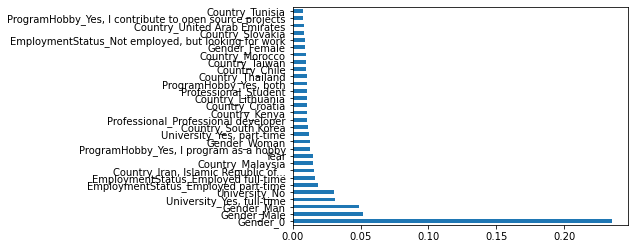

In [93]:
#feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

## Train the data for our Model

## 1. Create df with top 20 features

In [97]:
df_topn = df_noIndia[[
'Gender_0', 
'Gender_Male',
'Gender_Man',
'University_Yes, full-time',
'University_No',
'EmploymentStatus_Employed part-time',
'EmploymentStatus_Employed full-time',
'Year',   
'Gender_Woman',    
'University_Yes, part-time', 
'Professional_Professional developer',   
'Professional_Student', 
'ProgramHobby_Yes, both',
'Gender_Female',
'EmploymentStatus_Not employed, but looking for work',
'ProgramHobby_Yes, I contribute to open source projects',
]]

In [98]:
df_topn.shape

(303591, 16)

## 2. Scale the data

In [101]:
from sklearn.preprocessing import StandardScaler, RobustScaler
df_strd_scale = df_topn

In [102]:
from sklearn.preprocessing import StandardScaler
sc_A = StandardScaler()
sc_A_fitted = sc_A.fit(df_strd_scale) #need to save this for scoring
dfindvar_prepared = sc_A_fitted.transform(df_strd_scale) #scaled X2 training

In [103]:
dfindvar_prepared.shape
#(303591, 16)

(303591, 16)

## 3. Splitting dataset into Train and Test (70 / 30)

In [104]:
X = dfindvar_prepared
y = dfdummy_nazero['Country_India']

In [105]:
X.shape

(303591, 16)

In [106]:
y.shape

(303591,)

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42, shuffle = True)

In [108]:
print(X_train.shape) #(212513, 16)
print(X_test.shape) #(91078, 16)
print(y_train.shape) #(212513,)
print(y_test.shape) #(91078,)

(212513, 16)
(91078, 16)
(212513,)
(91078,)


## Checking which Machine Learning technique to use for our model by comparing accuracy

### Importing in all libraries that may be required to compare different models

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import os, math, time, random, datetime

#PCA
from sklearn.decomposition import PCA

#Resampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## Models
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.svm import LinearSVC
#import catboost                                         #Catboost,like LGBM, can accept categorical features without encoding them, unlike RF & XG Boost
#from catboost import CatBoostClassifier, Pool, cv

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

##Shap values
import shapely

In [110]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train_rus, y_train_rus, cv):
    
    # One Pass
    model = algo.fit(X_train_rus, y_train_rus)
    acc = round(model.score(X_train_rus, y_train_rus) * 100, 2)
    
    # Cross Validation 
    train_pred = cross_val_predict(algo, 
                                   X_train_rus,
                                   y_train_rus,
                                   cv=cv,
                                   n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(accuracy_score(y_train_rus, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

#### Logistic Regression

In [111]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))
#Accuracy: 88.02
#Accuracy CV 10-Fold: 88.02
#Running Time: 0:00:22.159807

Accuracy: 88.02
Accuracy CV 10-Fold: 88.02
Running Time: 0:00:22.159807


#### Linear SVC

In [112]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                               X_train, 
                                                               y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))
#Accuracy: 88.02
#Accuracy CV 10-Fold: 88.02
#Running Time: 0:06:43.969960

C:\Users\skavanagh1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy: 88.02
Accuracy CV 10-Fold: 88.02
Running Time: 0:06:43.969960


#### Random Forest

In [113]:
# Random Forest
start_time = time.time()
train_pred_rf, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(),
                                                               X_train, 
                                                               y_train, 
                                                                10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))
#Accuracy: 88.02
#Accuracy CV 10-Fold: 88.0
#Running Time: 0:01:26.172997

Accuracy: 88.02
Accuracy CV 10-Fold: 88.0
Running Time: 0:01:26.172997


#### Decision Tree Classifier

In [114]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))
#Accuracy: 88.02
#Accuracy CV 10-Fold: 88.01
#Running Time: 0:00:03.153515

Accuracy: 88.02
Accuracy CV 10-Fold: 88.01
Running Time: 0:00:03.153515


#### Gradient Boosting Trees

In [115]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))
#Accuracy: 88.02
#Accuracy CV 10-Fold: 88.02
#Running Time: 0:02:41.582730

Accuracy: 88.02
Accuracy CV 10-Fold: 88.02
Running Time: 0:02:41.582730


### Comparing the Cross Validation Scores of each ML technique

In [117]:
# Cross-validation Accuracy Scores


models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Linear SVC', 
              'Random Forest', 
              'Decision Tree Classifier', 
              'Gradient Boosting Trees'],
    'Score': [
        acc_cv_log,  
        acc_cv_linear_svc,
        acc_cv_rf,
        acc_cv_dt,
        acc_cv_gbt
    ]})
print("---Cross-validation Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
0,Logistic Regression,88.02
1,Linear SVC,88.02
4,Gradient Boosting Trees,88.02
3,Decision Tree Classifier,88.01
2,Random Forest,88.00


## Checking Accuracy Scores for each ML technique after .fit and .predict

In [118]:
#Logistic Regression
lr_model = LogisticRegression().fit(X_train, y_train)
lr_y_pred= lr_model.predict(X_test)

In [119]:
#Linear SVC
lsvc_model = LinearSVC().fit(X_train, y_train)
lsvc_y_pred= lsvc_model.predict(X_test)

C:\Users\skavanagh1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [120]:
#Gradient Booosting Tree
gbt_model = GradientBoostingClassifier().fit(X_train, y_train)
gbt_y_pred= gbt_model.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
print("LR_Accuracy:",metrics.accuracy_score(y_test, lr_y_pred))
print("RF_Accuracy:",metrics.accuracy_score(y_test, lsvc_y_pred))
print("GBT_Accuracy:",metrics.accuracy_score(y_test, gbt_y_pred))

LR_Accuracy: 0.8801576670546125
RF_Accuracy: 0.8801576670546125
GBT_Accuracy: 0.8801576670546125


## Logistic Regression was chosen as the best Model based on CV Accuracy, Accuracy and Time to run

## Confusion matrix on test data using Logistic Regression
### Results show that 88% of test are True Positives, with approx. 12% being False Positives

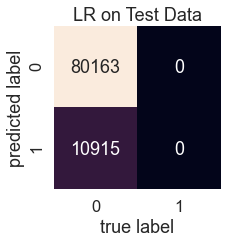

In [124]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, lr_y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, lr_y_pred),
                     annot=True, # Annotate the boxes
                     fmt='g',
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.title('LR on Test Data')
    
plot_conf_mat(y_test,lr_y_pred)

## AUC for Logistic Regression Model

In [125]:
lr_probs = lr_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs_pos = lr_probs[:, 1]

In [ ]:
lr_false_positive_rate, lr_true_positive_rate, lr_thresholds = metrics.roc_curve(y_test, lr_probs_pos)
metrics.auc(lr_false_positive_rate,lr_true_positive_rate)
#0.6029940725044367

## Showing the volume of respondants that will be most likely be from India

In [128]:
from collections import OrderedDict
results = pd.DataFrame(OrderedDict( { 'Ytest_India_Ind': y_test, 'INDIA_PROBS': lr_probs_pos } ) )   
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
groups = results.groupby([pd.cut(results.INDIA_PROBS, bins), 'Ytest_India_Ind'])
resultsdf = pd.DataFrame(groups.count().unstack().fillna(0))
#reversing row order
resultsdf = resultsdf.reindex(index=resultsdf.index[::-1])
#renaming columns
resultsdf.columns = ['Non_India_Cnt', 'India_Cnt']
#adding initial columns
Percentile_Bucket = ['90-100', '80-90', '70-80', '60-70', '50-60', '40-50', '30-40', '20-30', '10-20', '0-10' ]
decile_group = ['10', '9', '8', '7', '6', '5', '4', '3', '2', '1' ]
resultsdf['Percentile_Bucket'] = Percentile_Bucket
resultsdf['decile_group'] = decile_group
#reversing column order
columns = resultsdf.columns.tolist()
columns = columns[::-1]
resultsdf = resultsdf[columns]
resultsdf

,decile_group,Percentile_Bucket,India_Cnt,Non_India_Cnt
INDIA_PROBS,,,,
"(0.9, 1.0]",10,90-100,0.0,0.0
"(0.8, 0.9]",9,80-90,0.0,0.0
"(0.7, 0.8]",8,70-80,0.0,0.0
"(0.6, 0.7]",7,60-70,0.0,0.0
"(0.5, 0.6]",6,50-60,0.0,0.0
"(0.4, 0.5]",5,40-50,5.0,9.0
"(0.3, 0.4]",4,30-40,88.0,176.0
"(0.2, 0.3]",3,20-30,1310.0,5061.0
"(0.1, 0.2]",2,10-20,6161.0,41292.0
